<a href="https://colab.research.google.com/github/afrah1994/Prediction-of-Housing-Prices/blob/master/Data_Analysis_and_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
This notebook is made with the following dataset on kaggle (https://https://www.kaggle.com/vedavyasv/usa-housing) 

Housing prices all over US have been on an all time high and have been steeply growing in the past 6 years. This dataset will help us understand the relationship between housing prices and other factors that affect it.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
import time
from subprocess import check_output


In [0]:
from google.colab import files
files.upload()

Saving USA_Housing.csv to USA_Housing.csv


{'USA_Housing.csv': b'Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address\n79545.45857431678,5.682861321615587,7.009188142792237,4.09,23086.800502686456,1059033.5578701235,"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101"\n79248.64245482568,6.0028998082752425,6.730821019094919,3.09,40173.07217364482,1505890.91484695,"188 Johnson Views Suite 079\nLake Kathleen, CA 48958"\n61287.067178656784,5.865889840310001,8.512727430375099,5.13,36882.15939970458,1058987.9878760849,"9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489"\n63345.24004622798,7.1882360945186425,5.586728664827653,3.26,34310.24283090706,1260616.8066294468,"USS Barnett\nFPO AP 44820"\n59982.197225708034,5.040554523106283,7.839387785120487,4.23,26354.109472103148,630943.4893385402,"USNS Raymond\nFPO AE 09386"\n80175.7541594853,4.9884077575337145,6.104512439428879,4.04,26748.428424689715,1068138.0743935304,"06039 Jennifer Islands Apt. 443\nTracyport, KS 1

In [0]:
data = pd.read_csv('USA_Housing.csv')

In [0]:
print(data.shape)
print(data.columns)

(5000, 7)
Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


Our dataset has 5000 rows and 7 columns

In [0]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Data Cleaning

In [0]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None


As we can see from the above observation our dataset does not have any null values. This means we can use all 5000 rows for our prediction. 

In [0]:
data['Address'].value_counts()

453 Morris Junction\nAshleymouth, MN 53178-1590            1
7409 William Mountains\nRichardstad, MT 38781              1
3757 Price Rue\nEast Colin, MD 62622-8672                  1
759 Oneal Crescent\nColleenport, NM 31592-5032             1
481 Sarah Plaza\nEast Meganton, SD 39173-7869              1
                                                          ..
USS Williams\nFPO AA 31030                                 1
364 Anthony Ridge Suite 812\nPort Daniel, NY 52936-3440    1
5672 Barton Port\nGonzalesborough, PR 77884                1
21473 Harris Mills Suite 116\nNew Todd, ND 42714           1
365 Sue Place Apt. 092\nLake Davidport, VT 70760           1
Name: Address, Length: 5000, dtype: int64

With the `data['variable'].value_counts()` function we are trying to see if any of the address values are similar so we can use them in our prediction. But as we can observe from the above output our address values are all distinct, In this case it would be better to remove this last column as an input variable in our prediction. 

In [0]:
data.drop(["Address"], axis = 1, inplace = True) 

The `data.drop()` function can be used to drop rows or columns from our dataset. The `axis` value needs to be 1 if we want to drop columns.

Since most of the columns have very big names and are difficult to remember, I have decided to go with convention and decapitalize them and use an underscore '_' between words. We can do this using the` rename() `function

In [0]:
data.rename(columns={'Avg. Area Income':'avg_area_income',
                          'Avg. Area House Age':'avg_area_house_age',
                          'Avg. Area Number of Rooms':'avg_area_num_of_rooms',
                          'Avg. Area Number of Bedrooms':'avg_area_num_of_brooms',
                          'Area Population':'area_pop',
                          'Price':'price'}, inplace=True)
 
print(data.columns)


Index(['avg_area_income', 'avg_area_house_age', 'avg_area_num_of_rooms',
       'avg_area_num_of_brooms', 'area_pop', 'price', 'Address'],
      dtype='object')


These are our columns after cleaning the data:

In [0]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
avg_area_income           5000 non-null float64
avg_area_house_age        5000 non-null float64
avg_area_num_of_rooms     5000 non-null float64
avg_area_num_of_brooms    5000 non-null float64
area_pop                  5000 non-null float64
price                     5000 non-null float64
dtypes: float64(6)
memory usage: 234.5 KB
None


# Data Visualization

`data.describe()` function helps us see the mean , standard deviation and other statistical values of our input variables and target (Price) values.

In [0]:
data.describe()

,avg_area_income,avg_area_house_age,avg_area_num_of_rooms,avg_area_num_of_brooms,area_pop,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


Let us see how the distribution of our columns look like by plotting a histogram. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f90ad6128>,
      dtype=object)

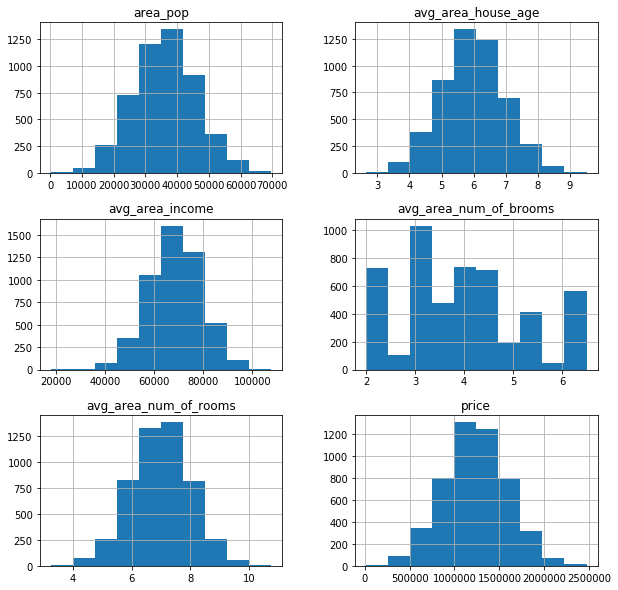

In [0]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = ((10,10))
data.hist()

From the above histogram we can observe that:
 * For most of the rows (>1000) the average area population falls between 30,000 and 40,000.
 * For most of the rows(>1000) the average age of the house falls between the range of 5.5 and 6.75
 * For most of the rows(>1250) the average area Income falls between 60,000 and 80,000 
 * The data for average area of bedrooms differs largely with one large peak at 3 (for around 1000 houses) and small similar peaks at 2,4 and 6.
 * For most of the rows(>1250) the average area of number of rooms falls between the range of 6-8.
 * For most of the rows (>1200) the Price range falls between 1 million and 1.5 million.

We can also look at the relationship between all our columns by using a scatter plot (For bivariate relationship) and a heat map (for multivariate relationship).

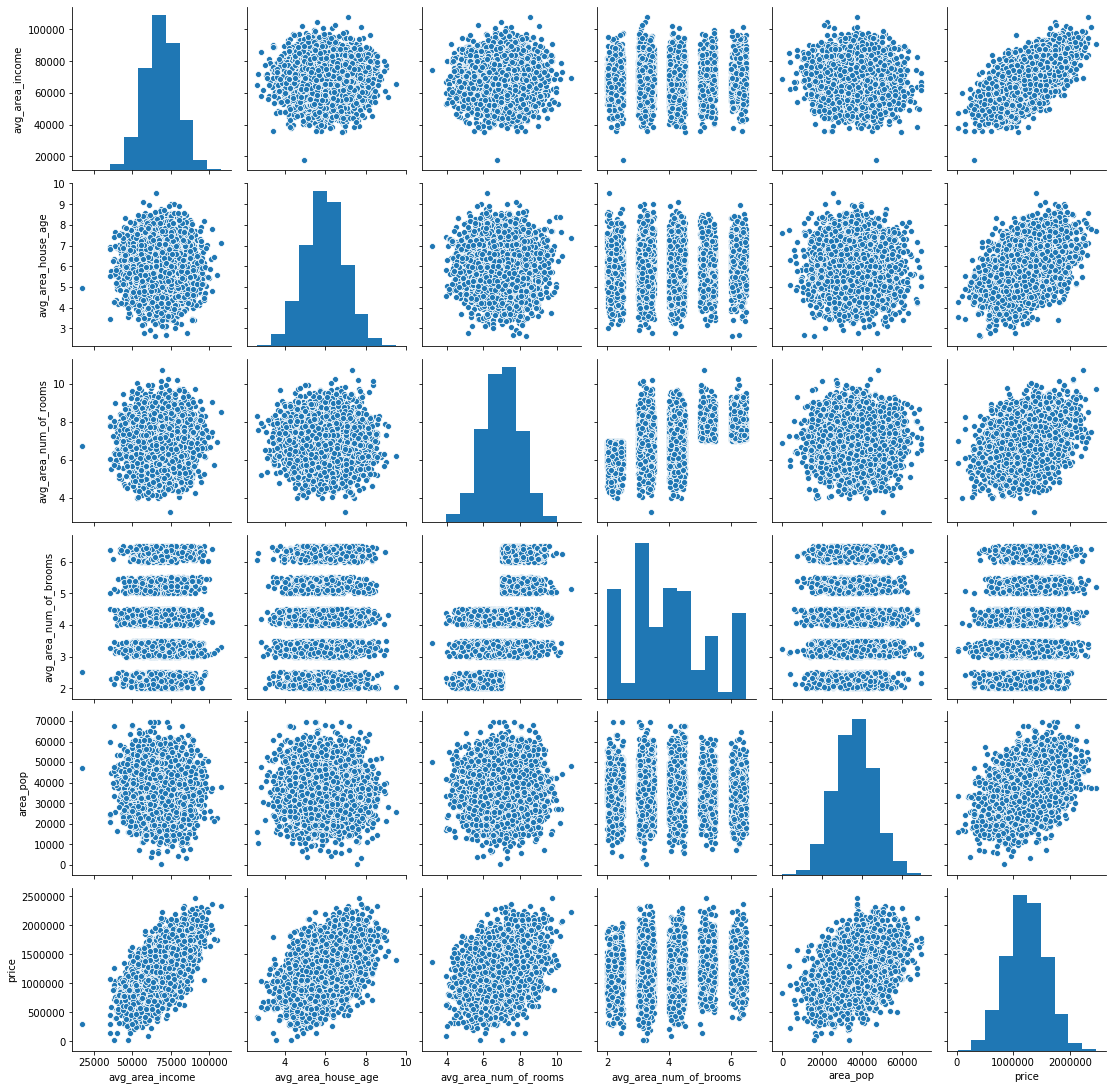

In [0]:

plt.rcParams["figure.figsize"] = ((5,5))
sns.pairplot(data)

As we can observe from the scatter plots. Our average area number of bedrooms doesn't have a linear relationship with any of our columns including the price column. It would make sense to remove this column from our consideration. The rest of the columns seem to have a linear relationship with the price. Average area income has the best/strongest linear positive relationship with price. We can confirm these findings by drawing a heat map.

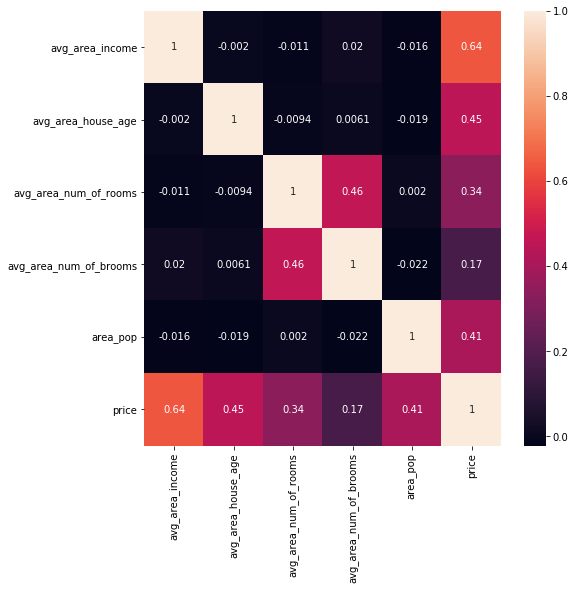

In [0]:
import seaborn as sns
plt.rcParams["figure.figsize"] = ((8,8))
correlation = data.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

From the above heat map it is obvious that price and average area income have the most correlation followed by Average area house age , area population, average area number of rooms and average area number of bedrooms. Since the correlation between Average number of area bedrooms and Price is not completely zero in the heat map I have decided to keep it for now.

# Data Normalization
To normalize our data we need to take the mean and the standard deviation. The following distrubution plots show how the values are distributed before normalization. 

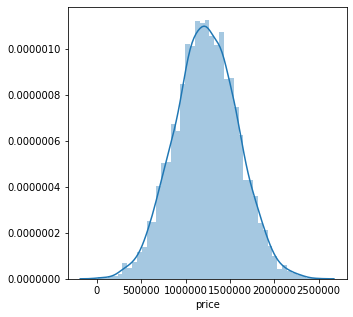

In [0]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = ((5,5))
sns.distplot(data.price)

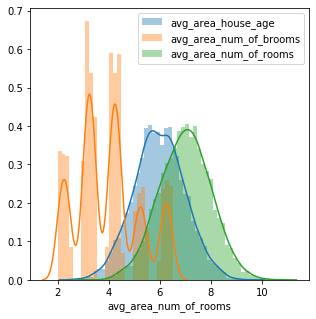

In [0]:
sns.distplot(data.avg_area_house_age, label='avg_area_house_age')
sns.distplot(data.avg_area_num_of_brooms, label="avg_area_num_of_brooms")
sns.distplot(data.avg_area_num_of_rooms, label="avg_area_num_of_rooms")
plt.legend()
plt.show()

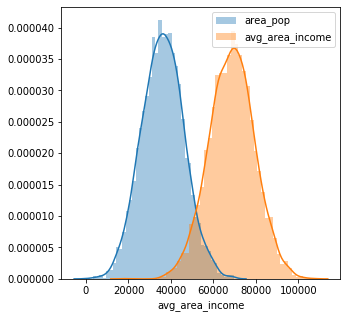

In [0]:
sns.distplot(data.area_pop, label='area_pop')
sns.distplot(data.avg_area_income, label='avg_area_income')
plt.legend()
plt.show()

Now lets normalize our data and plot them again to see the difference.

In [0]:
import numpy as np
# Use np.loadtxt() instead when there are non-numeric values as well
dataset=data.to_numpy()

In [0]:
np.set_printoptions(precision = 2) # does not work for too wide array
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

In [0]:
X = dataset[:, :-1]
Y = dataset[:, -1]

In [0]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [0]:
mean = Y.mean(axis=0)
Y -= mean
std = Y.std(axis=0)
Y /= std

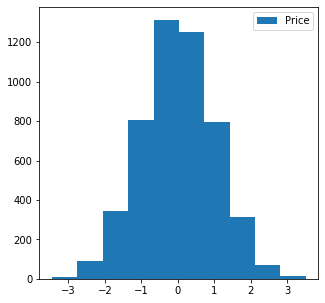

In [0]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = ((5,5))
plt.hist(Y, label='Price')
plt.legend()
plt.show()

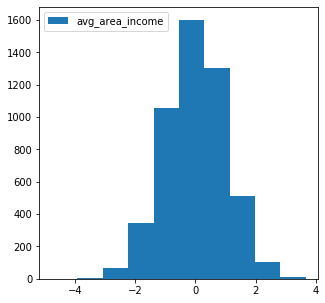

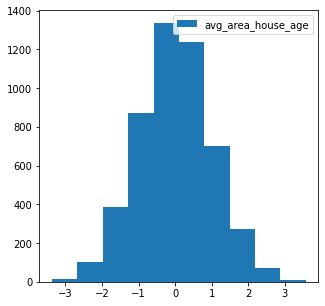

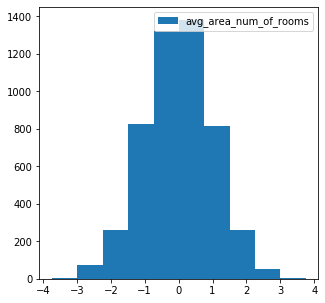

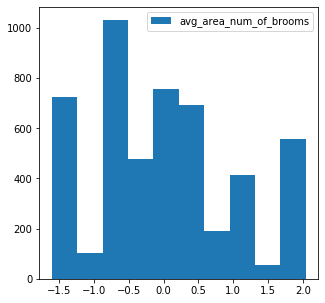

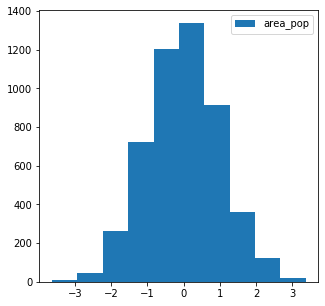

In [0]:
plt.hist(X[:,0], label='avg_area_income')
plt.legend()
plt.show()
plt.hist(X[:,1], label='avg_area_house_age')
plt.legend()
plt.show()
plt.hist(X[:,2], label='avg_area_num_of_rooms')
plt.legend()
plt.show()
plt.hist(X[:,3], label='avg_area_num_of_brooms')
plt.legend()
plt.show()
plt.hist(X[:,4], label='area_pop')
plt.legend()
plt.show()

As we can see our data is not normalized and its easier to work with this data now.